In [239]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import missingno as mso


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [240]:
df = pd.read_csv("insurance.csv", index_col=0).reset_index()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


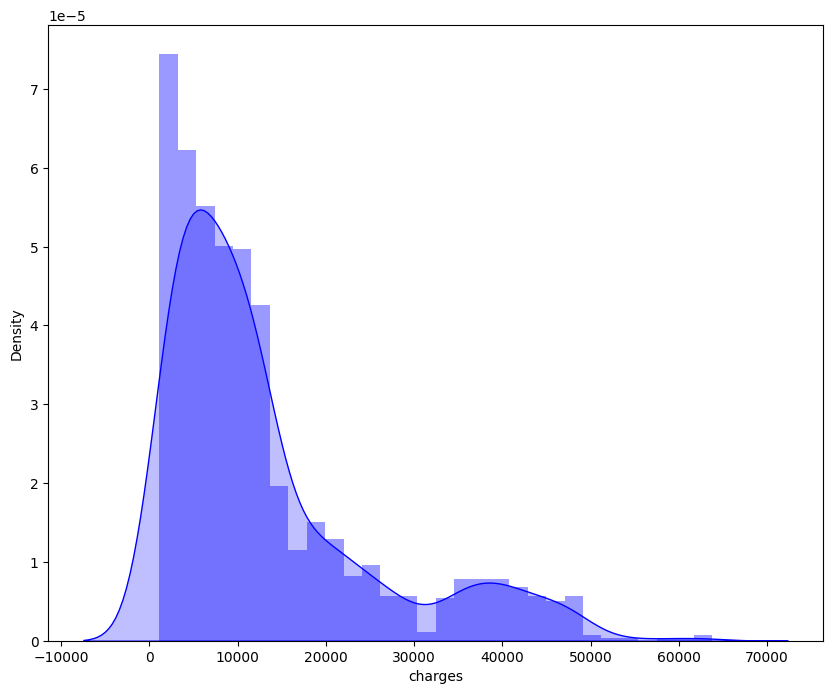

In [241]:
sns.distplot(
    df.charges,  
    color = "blue", 
    kde = True,
    kde_kws = {"shade": True, "linewidth": 1});


In [242]:
df_numerics = df.select_dtypes(include = np.number)
df_numerics.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


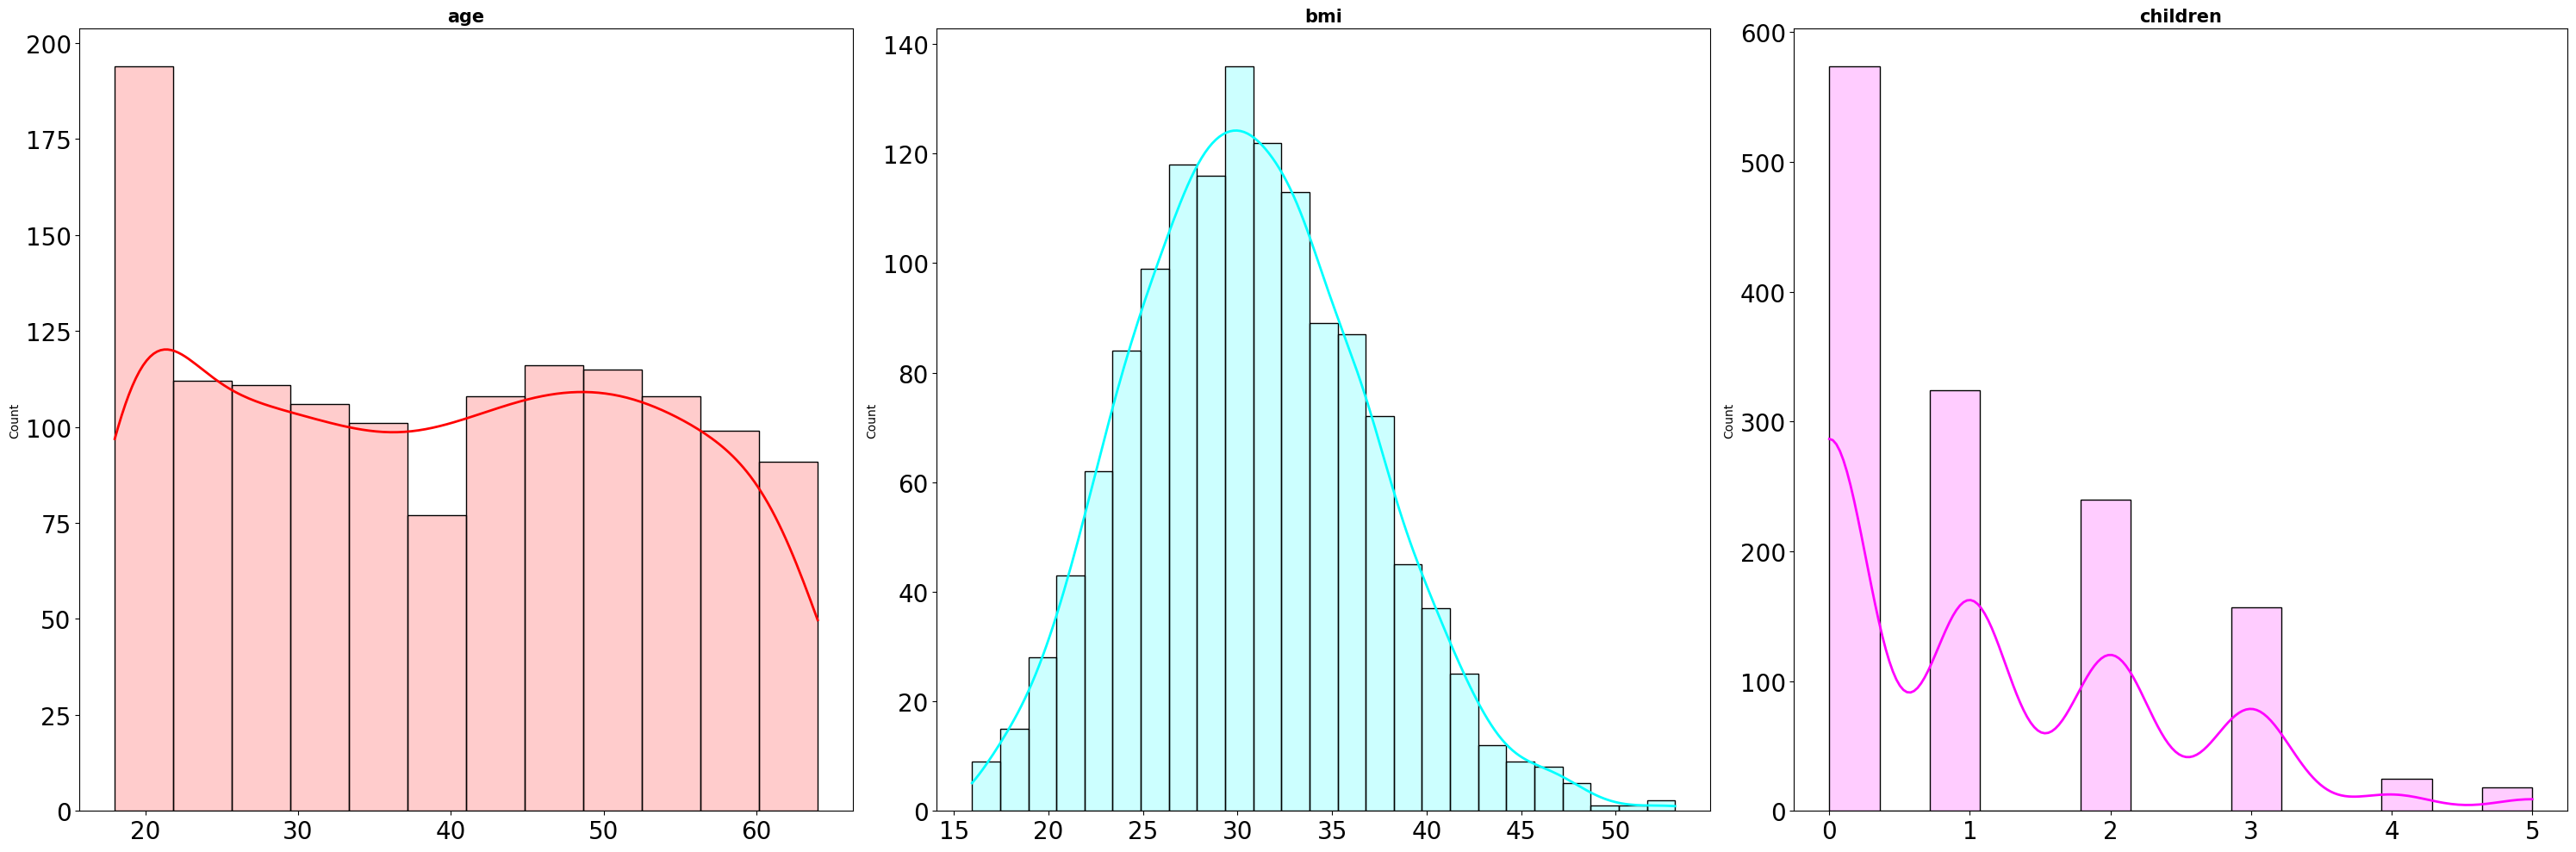

In [243]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = [ "red", "cyan", "magenta"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")
#es la variable respuesta, por lo que no tiene sentido que haga un subplot con sigo misma, asique la quitamos

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();
    

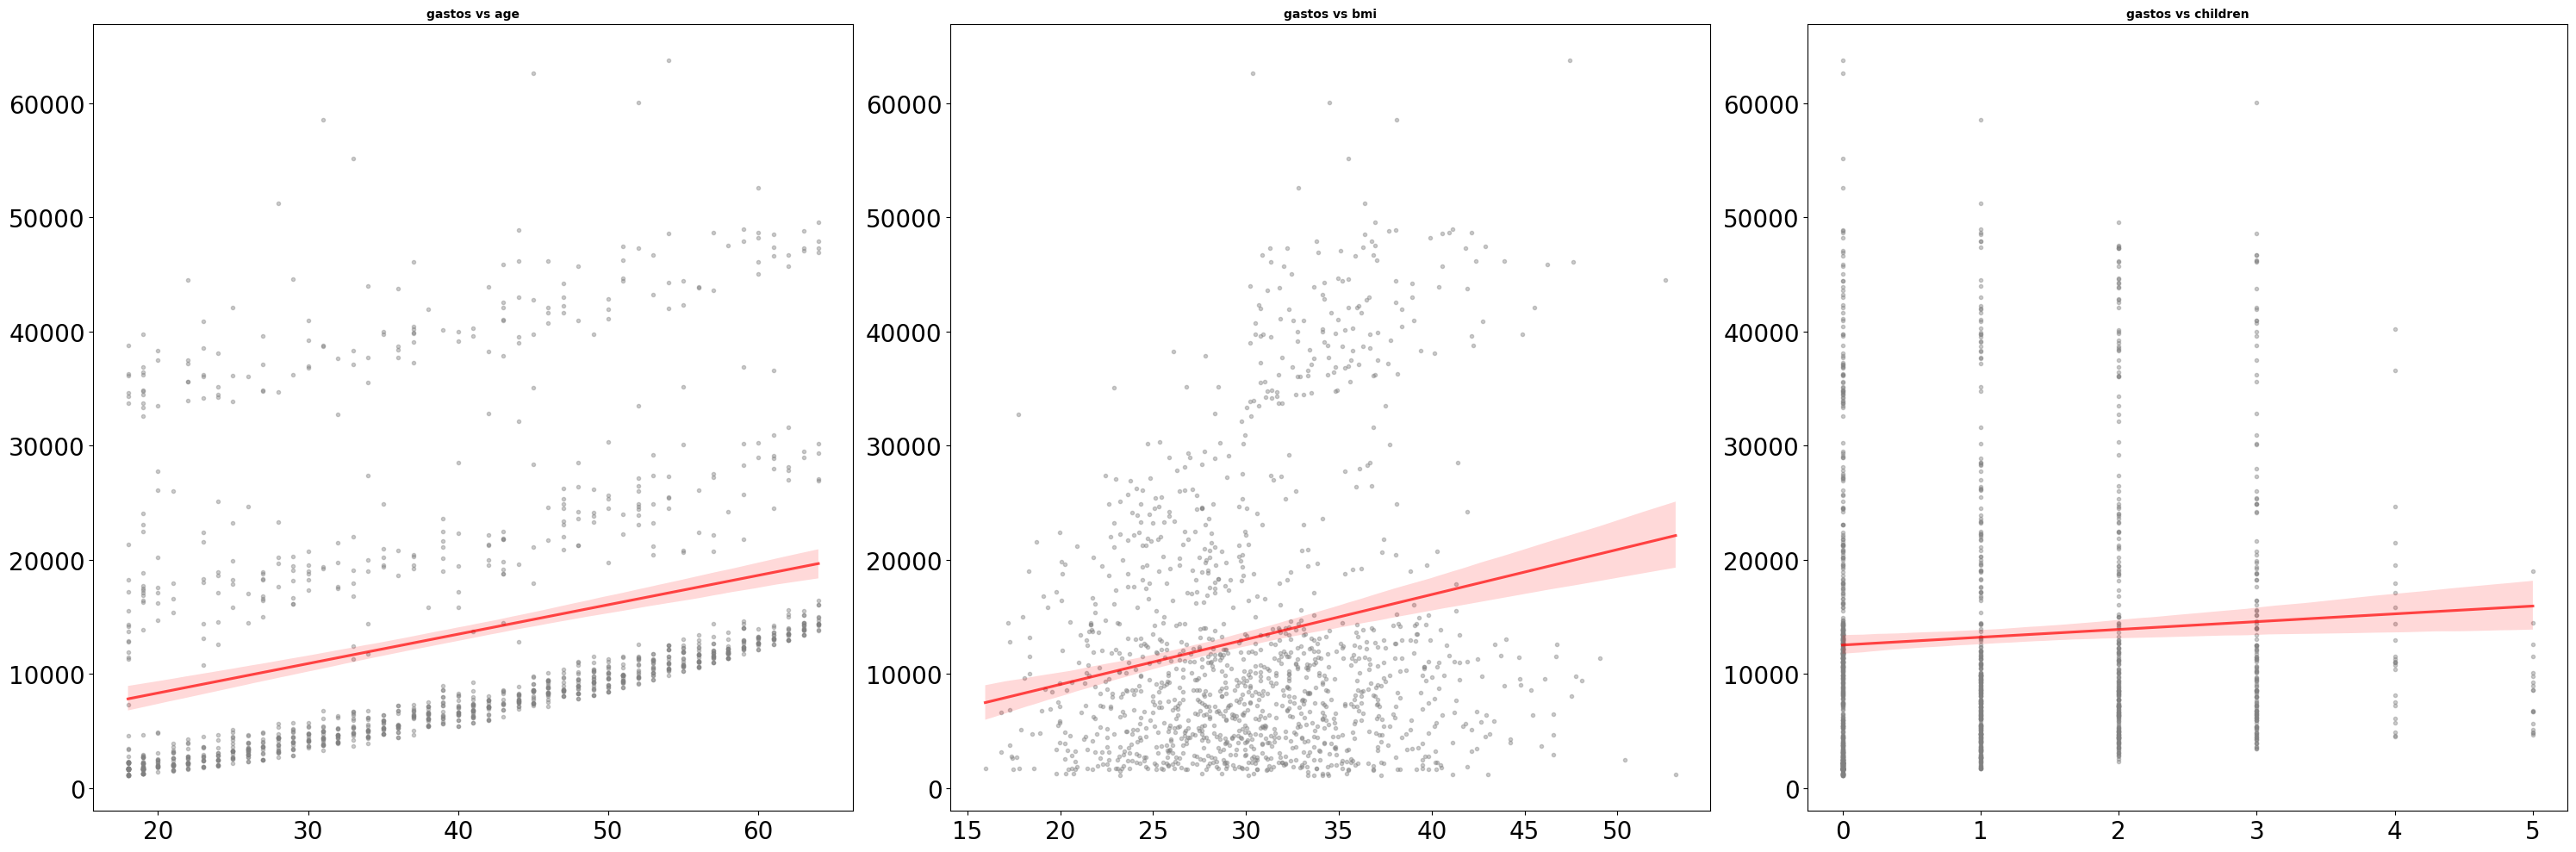

In [244]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"gastos vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

Aqui puedo ver que lo que le cuesta al seguro una persona no influye en la cantidad de hijos de este, es una linea muy recta.

In [245]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask


array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

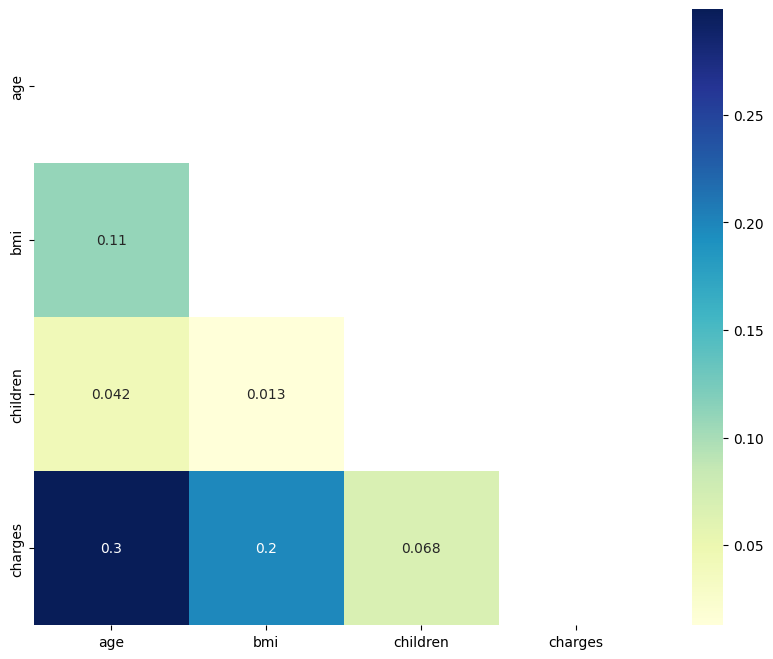

In [246]:
#se queda con los false
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

In [247]:
df_categoricas = df.select_dtypes(include = "object")
df_categoricas.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


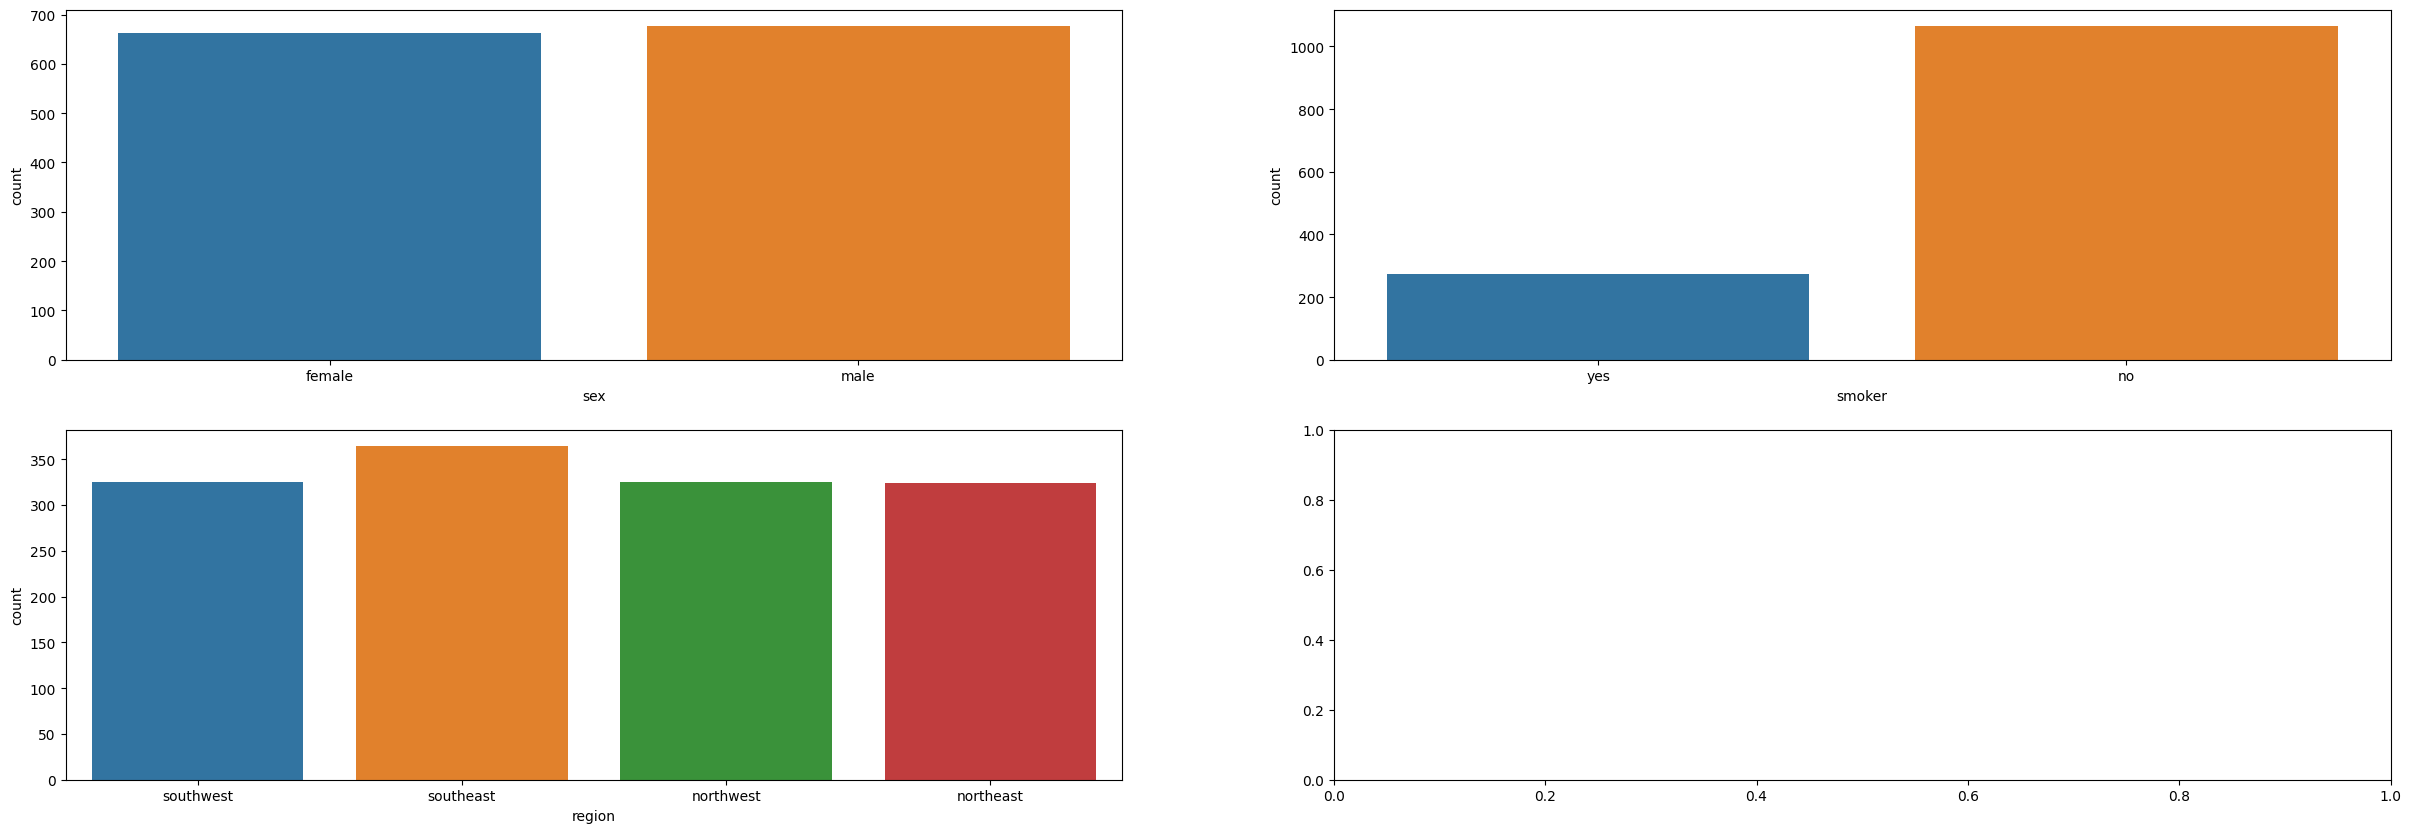

In [248]:
fig, axes = plt.subplots(nrows =2,ncols = 2, figsize = (30,10))
axes = axes.flat
for i , columns in enumerate(df_categoricas.columns):
    sns.countplot(data = df,
                  x = columns,
                  ax = axes[i]);

In [249]:
df_relacion_fumador = df.groupby("smoker")["charges"].mean().reset_index()
df_relacion_fumador

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


In [250]:
df_relacion_region = df.groupby("region")["charges"].mean().reset_index()
df_relacion_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [251]:
df_relacion = df.groupby("bmi")["charges"].mean().reset_index()
df_relacion

,bmi,charges
0,15.960,1694.796400
1,16.815,4904.000350
2,17.195,14455.644050
3,17.290,7813.353433
4,17.385,2775.192150
...,...,...
543,48.070,9432.925300
544,49.060,11381.325400
545,50.380,2438.055200
546,52.580,44501.398200


In [252]:
df_relacion_edad = df.groupby("age")["charges"].mean().reset_index()
df_relacion_edad.head()

,age,charges
0,18,7086.217556
1,19,9747.909335
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802


### Vamos a localizar los nulos y outliers, primero usando la libreria missigno que nos va a mostrar los nulos por columna:


<AxesSubplot: >

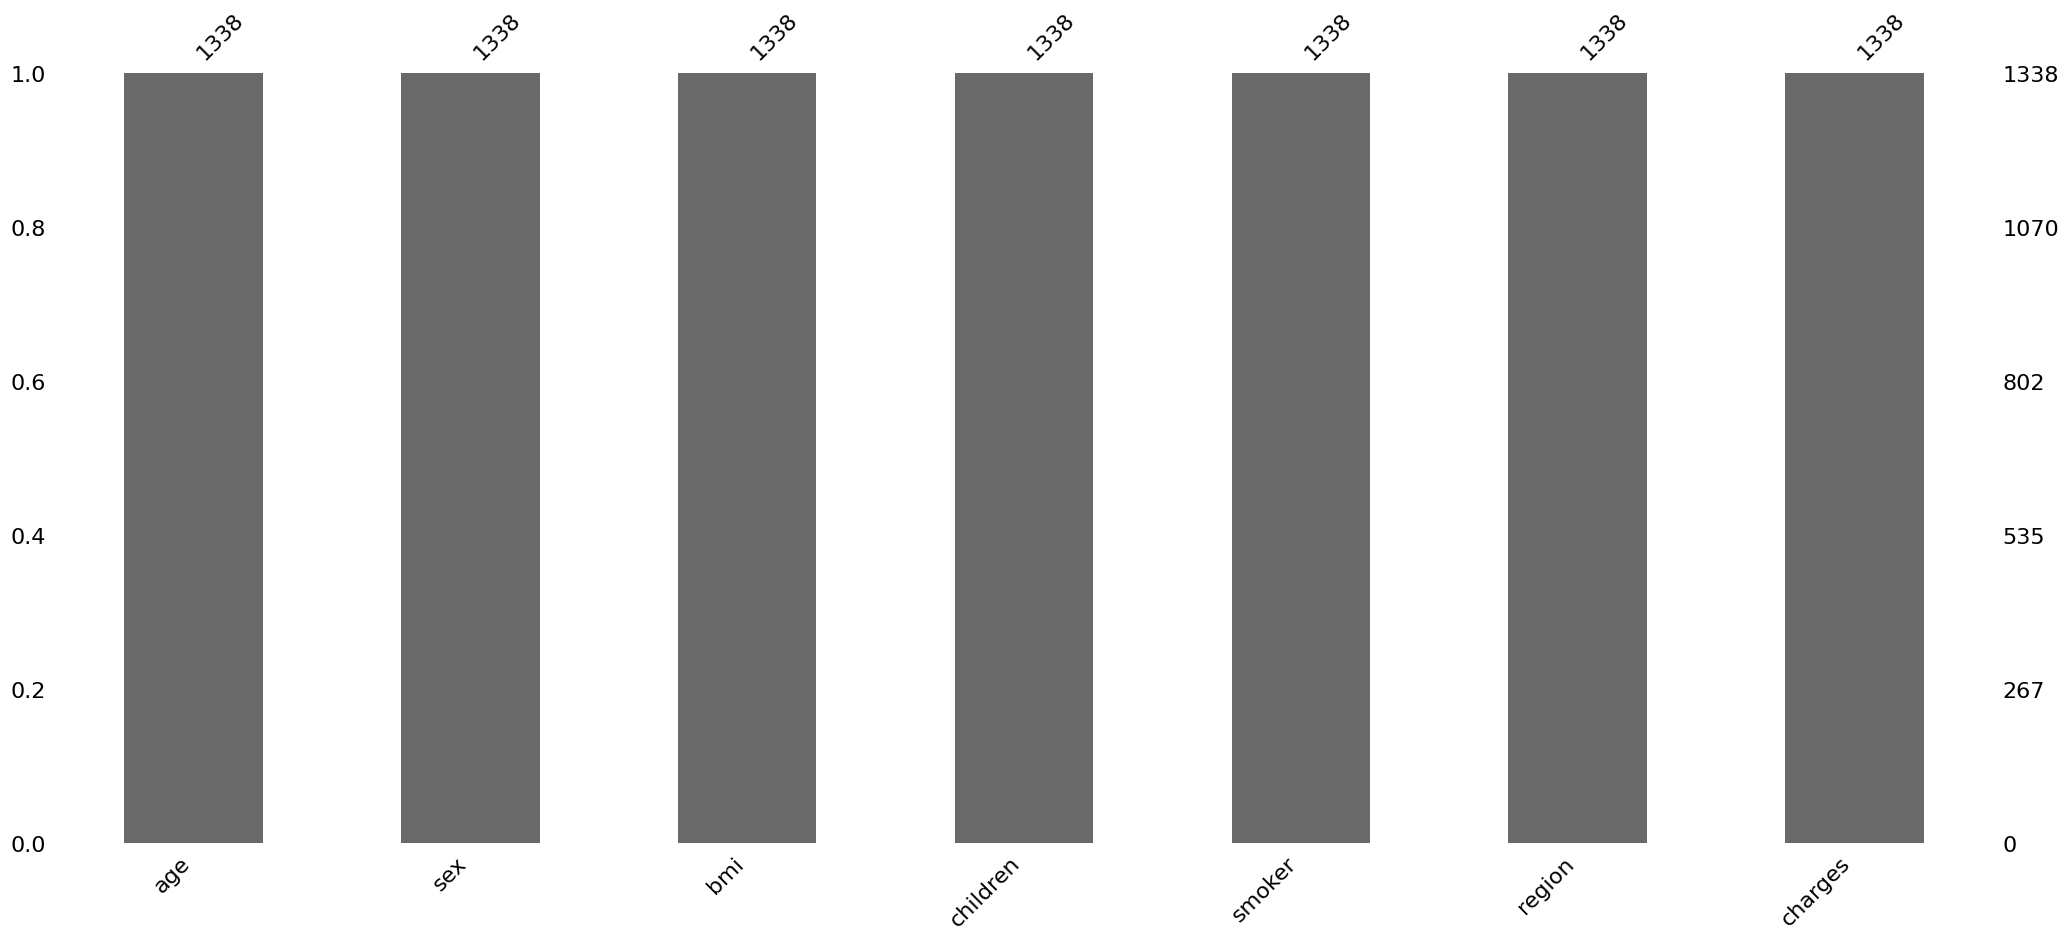

In [253]:
mso.bar(df)

In [254]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### En este caso no hay nulos ni vacios, por lo que pasamos a localizar los outliers.

In [255]:
df_numerics.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


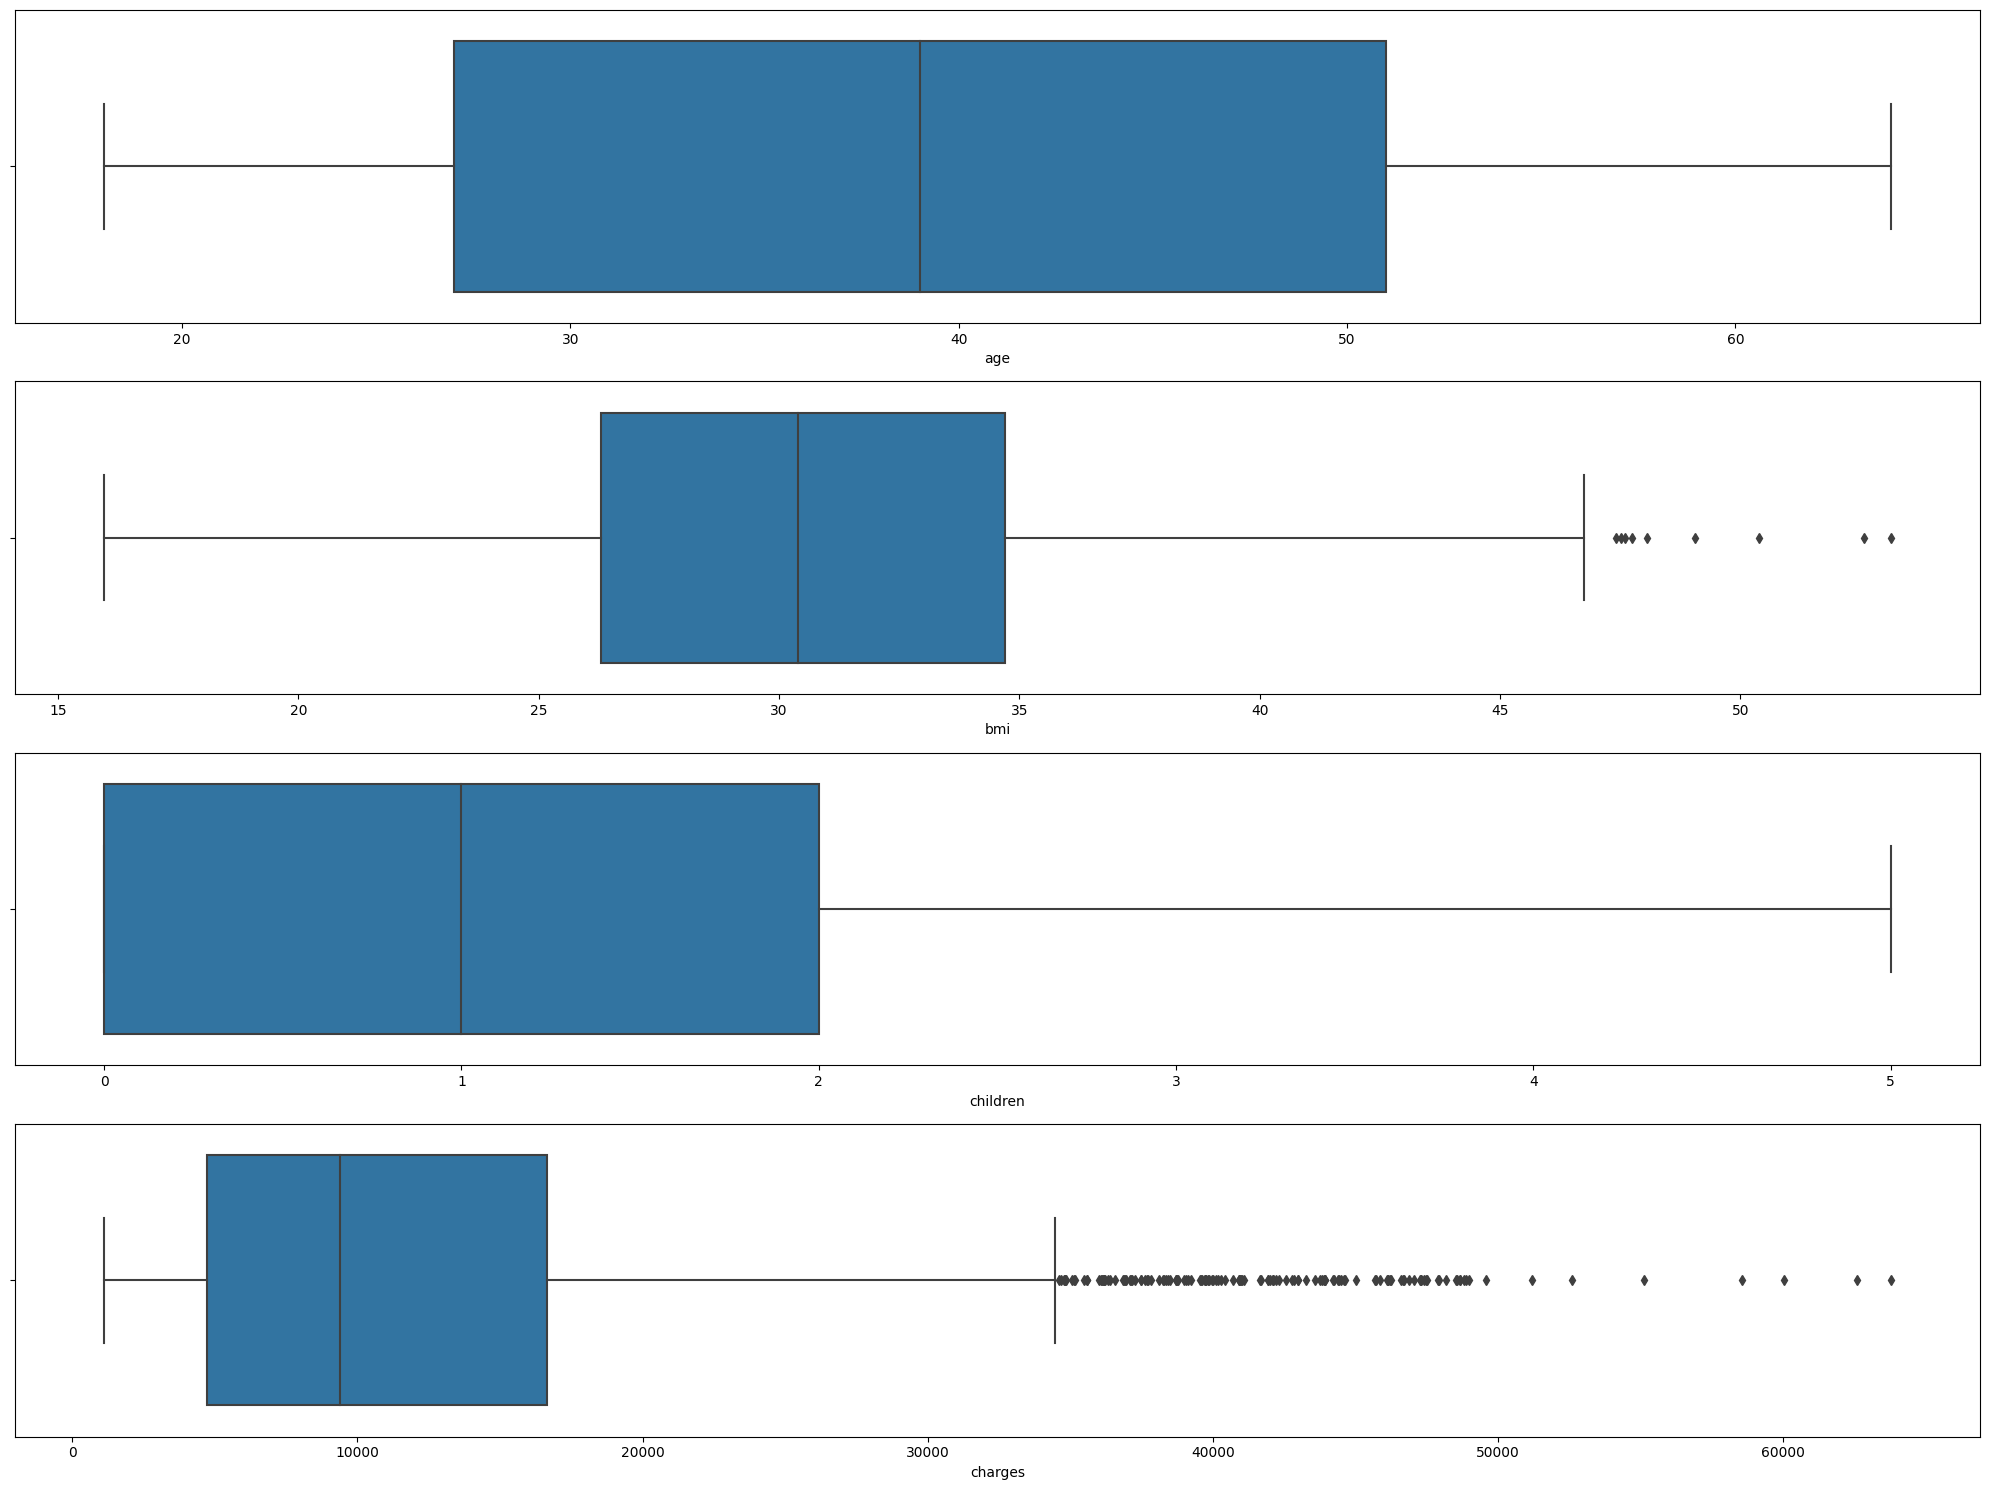

In [256]:
fig, axes = plt.subplots(nrows= 4,ncols= 1, figsize=(20,15))

for i , columna in enumerate(df_numerics.columns):
    
    sns.boxplot(data = df_numerics,
                x = columna,
                ax = axes[i])
    plt.tight_layout()

### me he dado cuenta que dividiendo la gente en fumadores y no fumadores disminuimos los outliers

In [257]:
df_nofum = df[(df["smoker"] == "no")].reset_index()
df_fum = df[df["smoker"] == "yes"].reset_index()
df_nofum.head()

,index,age,sex,bmi,children,smoker,region,charges
0,1,18,male,33.770,1,no,southeast,1725.55230
1,2,28,male,33.000,3,no,southeast,4449.46200
2,3,33,male,22.705,0,no,northwest,21984.47061
3,4,32,male,28.880,0,no,northwest,3866.85520
4,5,31,female,25.740,0,no,southeast,3756.62160


In [258]:
df_nofum.drop("index", axis= 1, inplace= True)

In [259]:
df_nofum.shape

(1064, 7)

In [260]:
df_nofum_num = df_nofum.select_dtypes(include = np.number)
df_nofum_num.head()

,age,bmi,children,charges
0,18,33.770,1,1725.55230
1,28,33.000,3,4449.46200
2,33,22.705,0,21984.47061
3,32,28.880,0,3866.85520
4,31,25.740,0,3756.62160


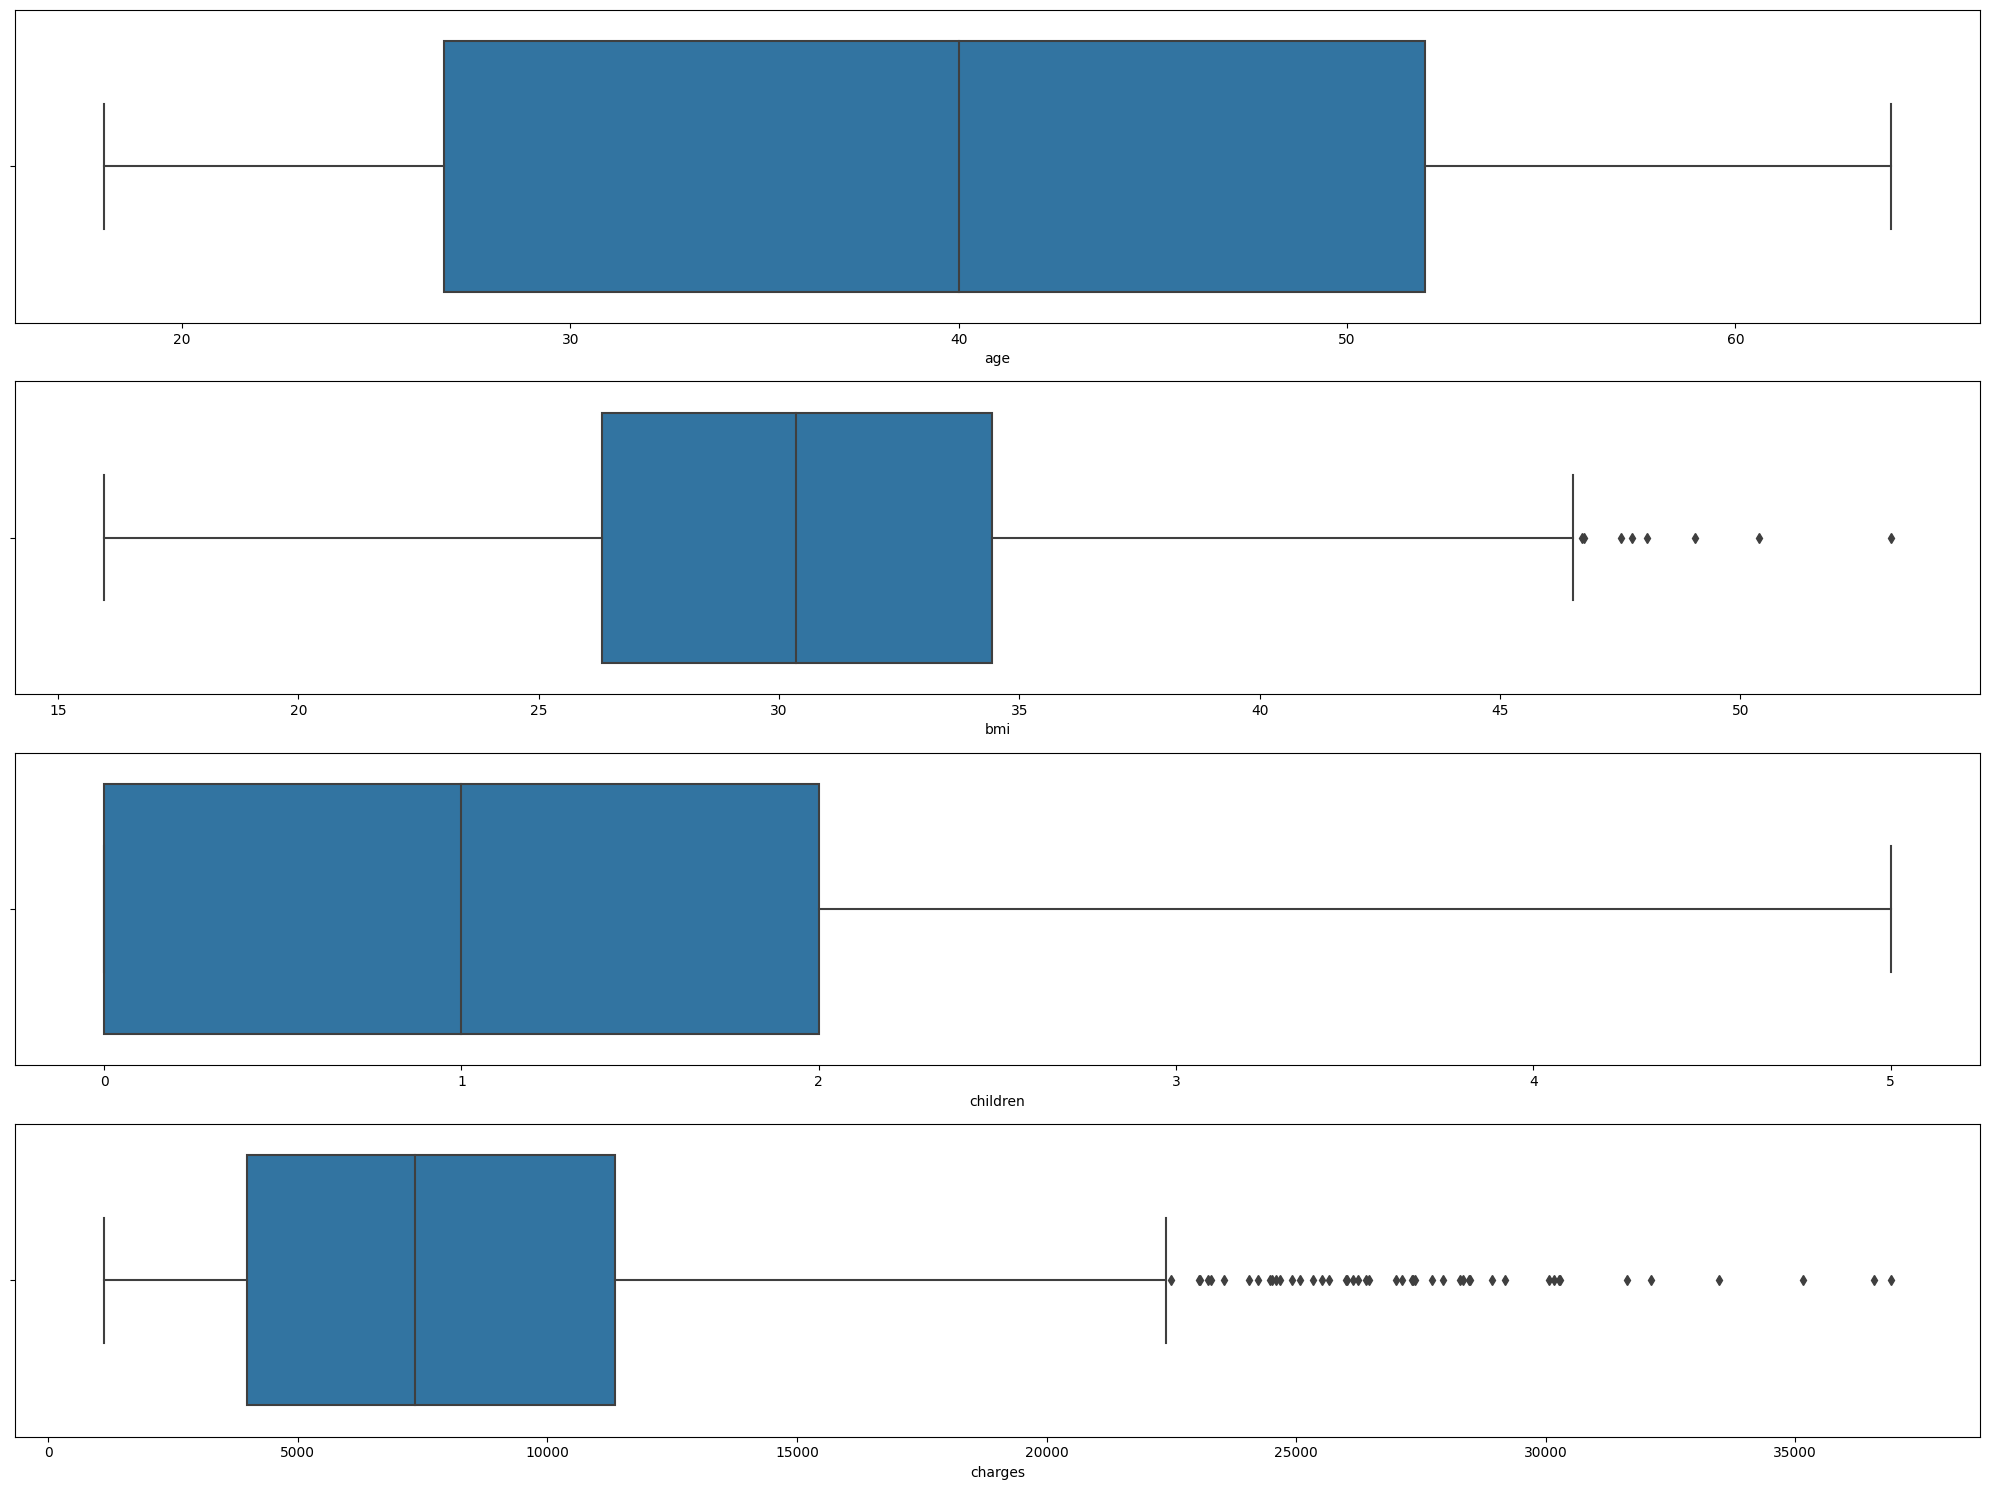

In [261]:
fig, axes = plt.subplots(nrows= 4,ncols= 1, figsize=(20,15))
for i , column in enumerate(df_nofum_num.columns):
    sns.boxplot(data = df_nofum_num,
                x = column,
                ax = axes[i])
    plt.tight_layout()

In [262]:
Q1_nofum = np.percentile(df_nofum['charges'], 25)
Q1_nofum

3986.4386999999997

In [263]:
Q3_nofum = np.percentile(df_nofum['charges'], 75)
Q3_nofum

11362.88705

In [264]:
IQR_nofum = Q3_nofum - Q1_nofum
IQR_nofum

7376.44835

In [265]:
outlier_step = 1.5 * IQR_nofum
outlier_step

11064.672525

In [266]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices

In [267]:
lista_colm_nofum = df_nofum_num.columns.to_list()
dicc_nofum = detectar_outliers(lista_colm_nofum, df_nofum_num)
dicc_nofum

{'bmi': [86, 219, 313, 680, 870, 1046], 'charges': [190, 812, 964]}

In [268]:
outliers_data_nofum = (dicc_nofum["bmi"],dicc_nofum["charges"])
outliers_data_nofum

([86, 219, 313, 680, 870, 1046], [190, 812, 964])

In [269]:
outliers_data_nofum = [indice for sublista in outliers_data_nofum for indice in sublista]
print(outliers_data_nofum)

[86, 219, 313, 680, 870, 1046, 190, 812, 964]


In [270]:
final_nofum = df_nofum.copy()

In [271]:
final_nofum.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1064.0,39.385338,14.083410,18.0000,26.7500,40.0000,52.00000,64.00000
bmi,1064.0,30.651795,6.043111,15.9600,26.3150,30.3525,34.43000,53.13000
children,1064.0,1.090226,1.218136,0.0000,0.0000,1.0000,2.00000,5.00000
charges,1064.0,8434.268298,5993.781819,1121.8739,3986.4387,7345.4053,11362.88705,36910.60803


In [272]:
a = df_nofum.iloc[outliers_data_nofum]
a

,age,sex,bmi,children,smoker,region,charges
86,58,male,49.06,0,no,southeast,11381.32540
219,46,female,48.07,2,no,northeast,9432.92530
313,47,male,47.52,1,no,southeast,8083.91980
680,23,male,50.38,1,no,southeast,2438.05520
870,52,male,47.74,1,no,southeast,9748.91060
1046,18,male,53.13,0,no,southeast,1163.46270
190,55,female,26.80,1,no,southwest,35160.13457
812,61,female,33.33,4,no,southeast,36580.28216
964,59,female,34.80,2,no,southwest,36910.60803


#### al ser muy pocos, solo voy a eliminar los casos raros, como los 3 que cuestan muchisimo y los 2 que cuestan muy poco.

In [273]:
to_delete = [964,812,190,1046,680]
final_nofum = final_nofum.drop(final_nofum.index[to_delete])
final_nofum.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,31,female,25.740,0,no,southeast,3756.62160


### hasta aqui tenemos los otliers de los no fumadores, y ahora vamos a sacar los de los fumadores, posteriormente juntandolos

In [274]:
df_fum_num = df_fum.select_dtypes(include = np.number)
df_fum_num.head()

,index,age,bmi,children,charges
0,0,19,27.90,0,16884.9240
1,11,62,26.29,0,27808.7251
2,14,27,42.13,0,39611.7577
3,19,30,35.30,0,36837.4670
4,23,34,31.92,1,37701.8768


In [275]:
df_fum.drop("index", axis = 1, inplace= True)

In [276]:
df_fum_num["charges"].mean()

32050.23183153284

In [277]:
lista_colum_fum = df_fum_num.columns.to_list()
lista_colum_fum

['index', 'age', 'bmi', 'children', 'charges']

In [278]:
Q1_fum = np.percentile(df_fum['charges'], 25)
Q1_fum

20826.2442125

In [279]:
Q3_fum = np.percentile(df_fum['charges'], 75)
Q3_fum

41019.207275

In [280]:
IQR_fum = Q3_fum - Q1_fum
IQR_fum

20192.9630625

In [281]:
outlier_step = 1.5 * IQR_fum
outlier_step

30289.44459375

In [282]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

In [283]:
df_fum_num.drop("index",axis = 1, inplace = True)

In [284]:
lista_colum_fum.remove("index")

In [285]:
dicc_fum = detectar_outliers(lista_colum_fum,df_fum_num)
dicc_fum

{'bmi': [110, 172, 211],
 'charges': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  19,
  20,
  22,
  24,
  29,
  31,
  36,
  40,
  42,
  43,
  44,
  45,
  47,
  51,
  54,
  55,
  56,
  57,
  61,
  62,
  64,
  66,
  67,
  68,
  71,
  73,
  74,
  75,
  76,
  77,
  78,
  80,
  82,
  85,
  87,
  92,
  93,
  94,
  95,
  101,
  102,
  104,
  108,
  109,
  110,
  112,
  113,
  114,
  115,
  116,
  120,
  121,
  124,
  125,
  126,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  143,
  144,
  145,
  147,
  150,
  158,
  160,
  161,
  163,
  164,
  166,
  167,
  168,
  170,
  172,
  173,
  177,
  179,
  183,
  184,
  186,
  187,
  189,
  190,
  200,
  201,
  204,
  206,
  207,
  211,
  212,
  214,
  215,
  216,
  218,
  220,
  222,
  224,
  225,
  227,
  228,
  229,
  230,
  231,
  232,
  238,
  242,
  244,
  246,
  248,
  249,
  250,
  259,
  260,
  261,
  262,
  263,
  264,
  269,
  272]}

In [286]:
outliers_data_fum = (dicc_fum["bmi"],dicc_fum["charges"])
outliers_data_fum

([110, 172, 211],
 [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  19,
  20,
  22,
  24,
  29,
  31,
  36,
  40,
  42,
  43,
  44,
  45,
  47,
  51,
  54,
  55,
  56,
  57,
  61,
  62,
  64,
  66,
  67,
  68,
  71,
  73,
  74,
  75,
  76,
  77,
  78,
  80,
  82,
  85,
  87,
  92,
  93,
  94,
  95,
  101,
  102,
  104,
  108,
  109,
  110,
  112,
  113,
  114,
  115,
  116,
  120,
  121,
  124,
  125,
  126,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  143,
  144,
  145,
  147,
  150,
  158,
  160,
  161,
  163,
  164,
  166,
  167,
  168,
  170,
  172,
  173,
  177,
  179,
  183,
  184,
  186,
  187,
  189,
  190,
  200,
  201,
  204,
  206,
  207,
  211,
  212,
  214,
  215,
  216,
  218,
  220,
  222,
  224,
  225,
  227,
  228,
  229,
  230,
  231,
  232,
  238,
  242,
  244,
  246,
  248,
  249,
  250,
  259,
  260,
  261,
  262,
  263,
  264,
  269,
  272])

In [287]:
outliers_data_fum = [indice for sublista in outliers_data_fum for indice in sublista]
print(outliers_data_fum)

[110, 172, 211, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 19, 20, 22, 24, 29, 31, 36, 40, 42, 43, 44, 45, 47, 51, 54, 55, 56, 57, 61, 62, 64, 66, 67, 68, 71, 73, 74, 75, 76, 77, 78, 80, 82, 85, 87, 92, 93, 94, 95, 101, 102, 104, 108, 109, 110, 112, 113, 114, 115, 116, 120, 121, 124, 125, 126, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 143, 144, 145, 147, 150, 158, 160, 161, 163, 164, 166, 167, 168, 170, 172, 173, 177, 179, 183, 184, 186, 187, 189, 190, 200, 201, 204, 206, 207, 211, 212, 214, 215, 216, 218, 220, 222, 224, 225, 227, 228, 229, 230, 231, 232, 238, 242, 244, 246, 248, 249, 250, 259, 260, 261, 262, 263, 264, 269, 272]


In [288]:
len(outliers_data_fum)

139

In [289]:
df_fum.iloc[outliers_data_fum]

,age,sex,bmi,children,smoker,region,charges
110,54,female,47.410,0,yes,southeast,63770.42801
172,37,female,47.600,2,yes,southwest,46113.51100
211,22,male,52.580,1,yes,southeast,44501.39820
2,27,male,42.130,0,yes,southeast,39611.75770
3,30,male,35.300,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
262,45,male,30.360,0,yes,southeast,62592.87309
263,62,male,30.875,3,yes,northwest,46718.16325
264,43,male,27.800,0,yes,southwest,37829.72420
269,19,female,34.700,2,yes,southwest,36397.57600


#### son muchos datos y los fumadores cuestan mucho mas que los que no, asiqeu estos datos los voy a dejar para mis modelos predictivos


In [290]:
final = pd.concat([final_nofum, df_fum])#*axis = 0
final.shape

(1333, 7)

In [291]:
final.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,31,female,25.740,0,no,southeast,3756.62160


In [292]:
final.to_csv("insurance_clean.csv")

#### ahora procedemos con la normalizacion(Variable respuesta) y estandarizacion(Variabless predictorias)

In [293]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [294]:
final.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,31,female,25.740,0,no,southeast,3756.62160


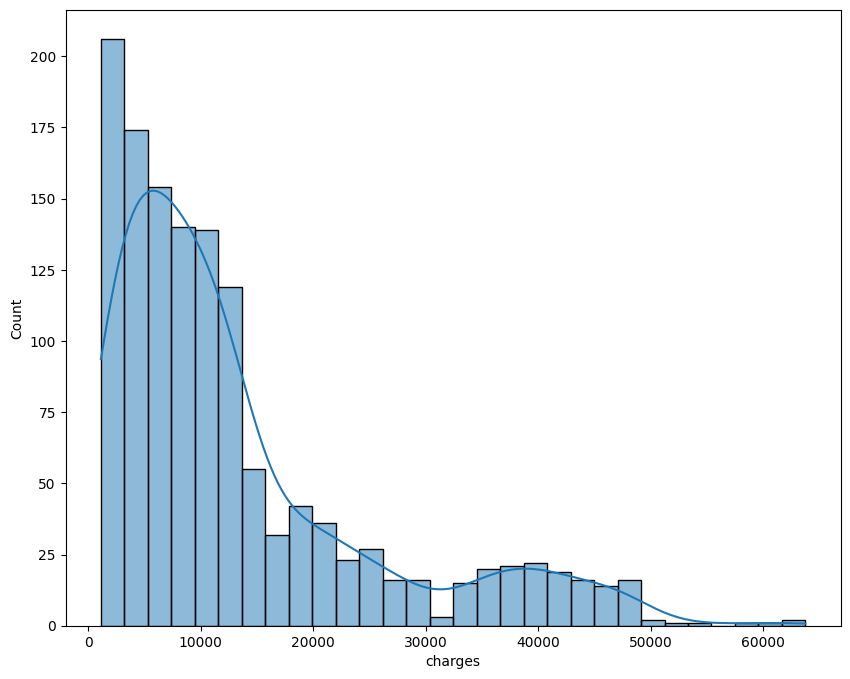

In [295]:
sns.histplot(data=final,
             x = "charges",
             kde =True);

### no hay distribucion normal, por lo que tendremos que transformar los datos


In [296]:
"""Ahi esta el pvalor: es una medida estadística que se utiliza en pruebas de hipótesis para determinar 
la significancia de los resultados obtenidos. En el contexto de machine learning, el valor p se utiliza 
para evaluar la validez estadística de los modelos de aprendizaje automático.

El valor p se calcula comparando la probabilidad de obtener los resultados observados bajo 
la hipótesis nula (es decir, que no hay relación entre las variables) con la probabilidad de obtener
 los mismos resultados bajo una hipótesis alternativa (es decir, que hay una relación entre las variables).
 Si el valor p es muy pequeño, típicamente menor que 0.05 o 0.01, se considera que los resultados
  son estadísticamente significativos y se rechaza la hipótesis nula.

En el contexto de machine learning, el valor p se utiliza para evaluar la significancia
 de los coeficientes de los modelos de regresión, la importancia de las características o variables
 predictivas y la significancia de las diferencias entre modelos. El valor p también se utiliza para evaluar
 la validez de los métodos de selección de características y de validación cruzada.
"""
stats.shapiro(final["charges"]) #Muy menor a 0,05, por lo que bien 👍

ShapiroResult(statistic=0.8137115836143494, pvalue=1.1107722983908243e-36)

In [297]:
final_num= final.select_dtypes(include = np.number)
final_column_num = final_num.columns.to_list()
final_column_num

['age', 'bmi', 'children', 'charges']

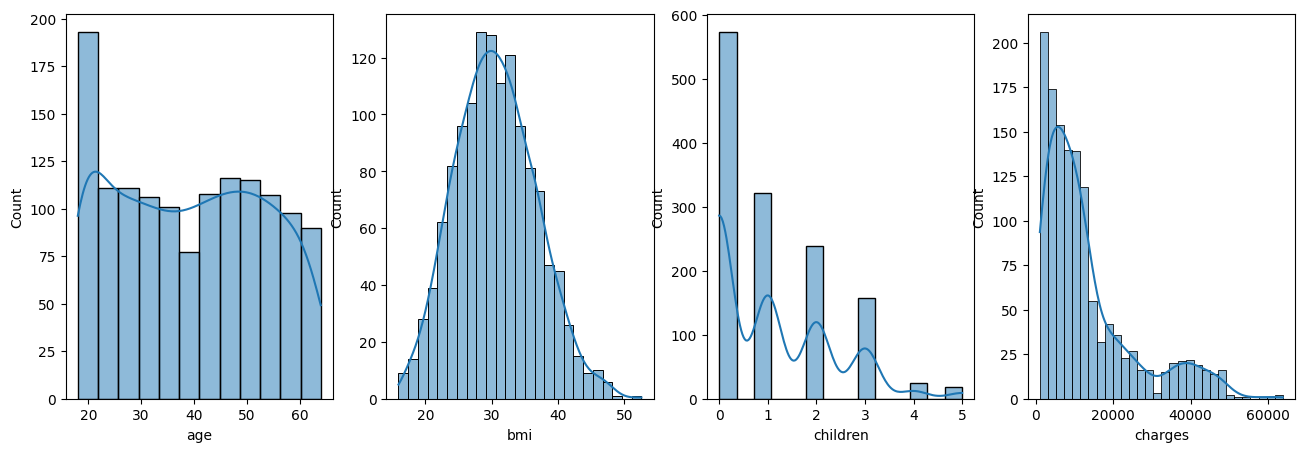

In [298]:
fig, ax = plt.subplots(1,5, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(final_column_num):
    sns.histplot(data = final_num, x = columna, kde = True, ax = ax[i])
    
fig.delaxes(ax[-1])
plt.show()

#### Vamos a aplicarle a nuestra variable la normalizacion "normal o manual"


In [299]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = final["charges"].mean()
maximo = final["charges"].max() 
minimo = final["charges"].min()

In [300]:
final["charges_MANUAL"] = (final["charges"] - media) / (maximo - minimo )

In [301]:
final.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL
0,18,male,33.770,1,no,southeast,1725.55230,-0.183730
1,28,male,33.000,3,no,southeast,4449.46200,-0.140251
2,33,male,22.705,0,no,northwest,21984.47061,0.139644
3,32,male,28.880,0,no,northwest,3866.85520,-0.149551
4,31,female,25.740,0,no,southeast,3756.62160,-0.151310


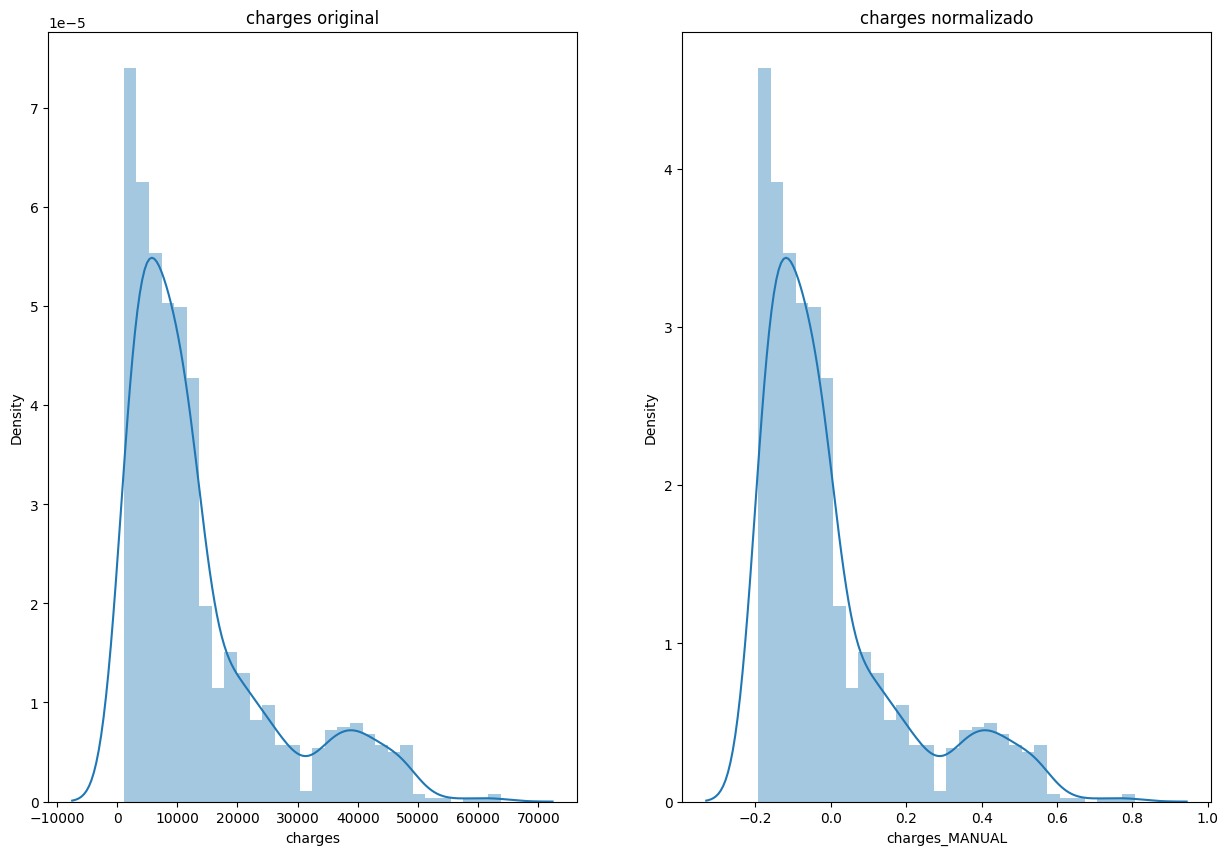

In [302]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_MANUAL'], ax = axes[1]);

In [303]:
stats.shapiro(final['charges_MANUAL']) # es el mismo pvalor, no cambia

ShapiroResult(statistic=0.8137115836143494, pvalue=1.1107722983908243e-36)

#### Normalizacion logaritmica:

In [304]:
final['charges_LOG'] = final['charges'].apply(lambda x: np.log(x))
final.head()


,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG
0,18,male,33.770,1,no,southeast,1725.55230,-0.183730,7.453302
1,28,male,33.000,3,no,southeast,4449.46200,-0.140251,8.400538
2,33,male,22.705,0,no,northwest,21984.47061,0.139644,9.998092
3,32,male,28.880,0,no,northwest,3866.85520,-0.149551,8.260197
4,31,female,25.740,0,no,southeast,3756.62160,-0.151310,8.231275


In [305]:
stats.shapiro(final['charges_LOG']) ## en este caso el pvalor es mayor por lo que seria "peor"

ShapiroResult(statistic=0.9834418892860413, pvalue=3.2274280470367955e-11)

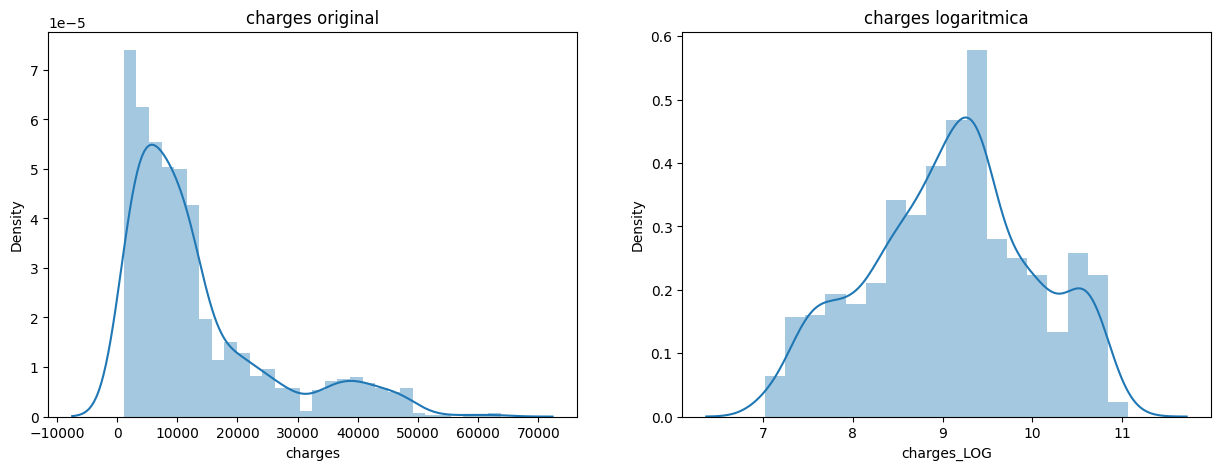

In [306]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges logaritmica')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_LOG'], ax = axes[1]);

#### normalizacion tipo Raiz cuadrada

In [307]:
final['charges_SQRT'] = final['charges'].apply(lambda x: math.sqrt(x))
final.head()

,age,sex,bmi,children,smoker,region,charges,charges_MANUAL,charges_LOG,charges_SQRT
0,18,male,33.770,1,no,southeast,1725.55230,-0.183730,7.453302,41.539768
1,28,male,33.000,3,no,southeast,4449.46200,-0.140251,8.400538,66.704288
2,33,male,22.705,0,no,northwest,21984.47061,0.139644,9.998092,148.271611
3,32,male,28.880,0,no,northwest,3866.85520,-0.149551,8.260197,62.184043
4,31,female,25.740,0,no,southeast,3756.62160,-0.151310,8.231275,61.291285


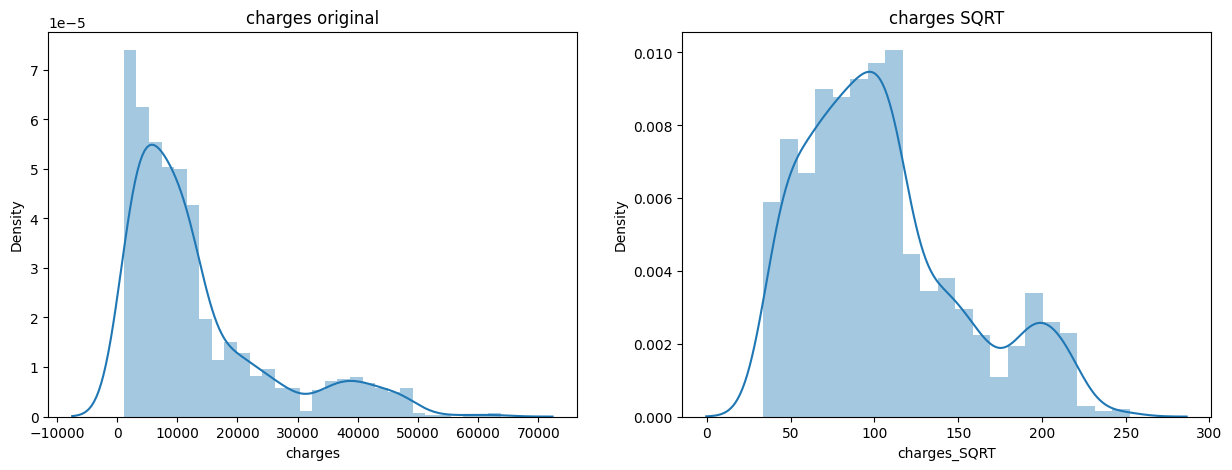

In [308]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges SQRT')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_SQRT'], ax = axes[1]);

In [309]:
stats.shapiro(final['charges_SQRT']) #mas que pequeña que la logaritmica pero mas grande que la manual

ShapiroResult(statistic=0.9337079524993896, pvalue=7.046284676859563e-24)

#### Metodo boxcox

In [310]:
from scipy import stats

In [311]:
final["charges_BOX"] , lambda_ajustada = stats.boxcox(final["charges"])

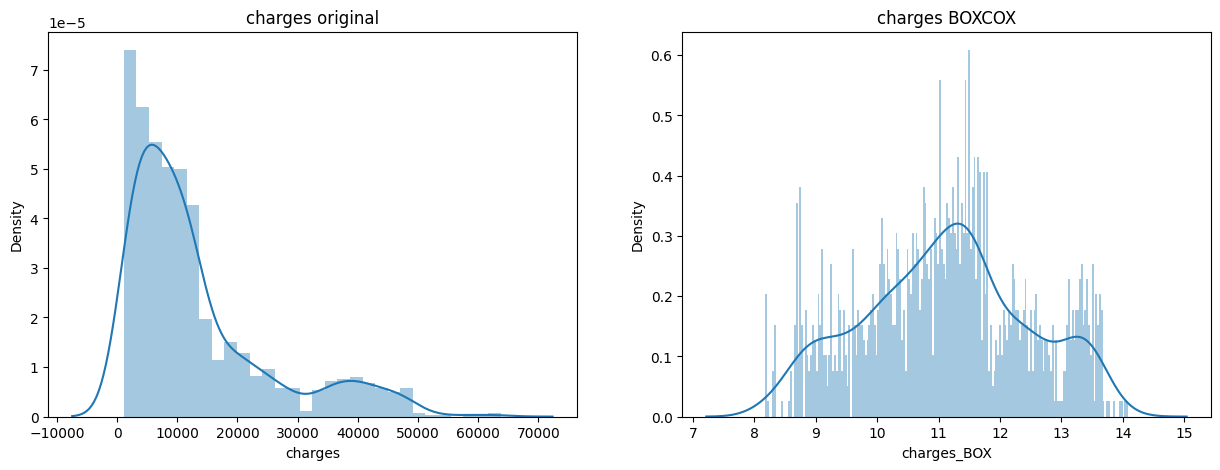

In [312]:
final["charges_BOX"], lambda_ajustada = stats.boxcox(final["charges"])

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges BOXCOX')

sns.distplot(final['charges'] ,ax = axes[0])
sns.distplot(final['charges_BOX'], ax = axes[1], bins = 200);

 he aumentado el numero de bins a ver si cambiaba su distribuciion y se parecia mas a una normal

In [313]:
stats.shapiro(final['charges_BOX']) # igual a la logaritmica

ShapiroResult(statistic=0.9837676882743835, pvalue=4.4950348998540335e-11)

#### metodo Sklearn MinMaxScaller

In [314]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [316]:
df_final = pd.read_csv("insurance_clean.csv", index_col= None)

In [317]:
# ajustamos el modelo utilizando nuestro set de datos , ***DOBLE CORCHETE
minmax.fit(df_final[['charges']])

MinMaxScaler()

In [318]:
# transformamos los datos
X_normalizadas = minmax.transform(df_final[['charges']])

In [319]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [320]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

In [321]:
# lo unimos a nuestro dataframe original
df_final['charges_NORM'] = X_normalizadas
df_final.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,charges_NORM
0,0,18,male,33.770,1,no,southeast,1725.55230,0.009636
1,1,28,male,33.000,3,no,southeast,4449.46200,0.053115
2,2,33,male,22.705,0,no,northwest,21984.47061,0.333010
3,3,32,male,28.880,0,no,northwest,3866.85520,0.043816
4,4,31,female,25.740,0,no,southeast,3756.62160,0.042056


In [322]:
df_final.drop("Unnamed: 0", axis = 1, inplace= True)

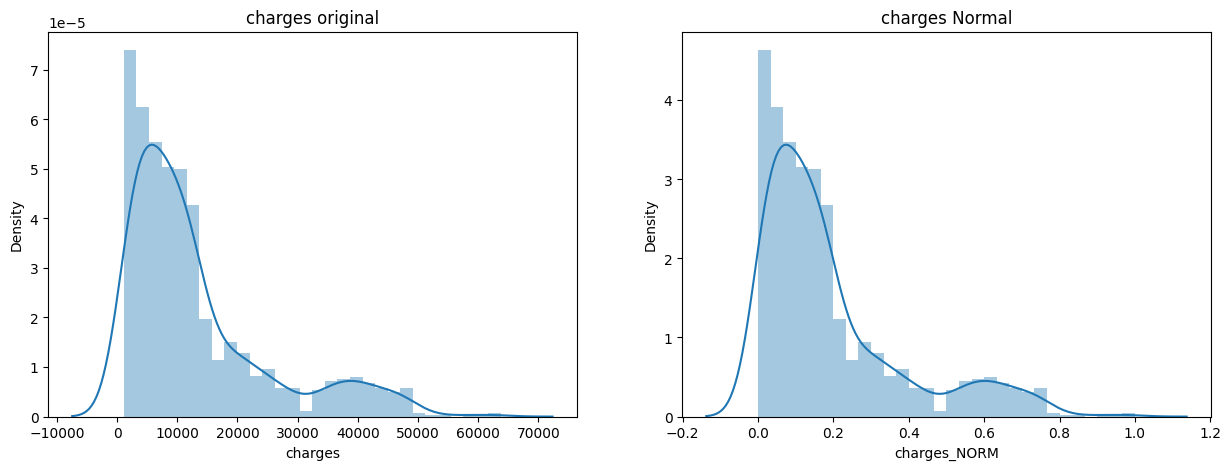

In [323]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges Normal')

sns.distplot(df_final['charges'] ,ax = axes[0])
sns.distplot(df_final['charges_NORM'], ax = axes[1]);

In [324]:
stats.shapiro(df_final['charges_NORM']) ## la grafica es exactamente igual que la manual

ShapiroResult(statistic=0.8137115836143494, pvalue=1.1107722983908243e-36)

#### me quedare con la minmaxscaler, ya que tiene el pvalor mas pequeño. Un p valor menor indica una mayor evidencia en contra de la hipotesis nula, por lo tanto, se considera mas significativo o importante.

#### no se ha conseguido normalizar, asique no se podra hacer regresion lineal**

In [326]:
#df_STD2.to_csv("insurance_clean_normalizado.csv")

### estandarizacion


In [327]:
## esto es un metodo que estandariza automaticamente todas las columnas del dataframe que le pasemos
from sklearn.preprocessing import StandardScaler

In [328]:
scaler = StandardScaler()

In [329]:
df_final_num  =df_final.select_dtypes(include= np.number)

In [330]:
lista_columnas = df_final_num.columns
lista_columnas

Index(['age', 'bmi', 'children', 'charges', 'charges_NORM'], dtype='object')

In [331]:
scaler.fit(df_final[lista_columnas])

StandardScaler()

In [332]:
X_escaladas = scaler.transform(df_final[lista_columnas])
X_escaladas

array([[-1.51132239,  0.51911042, -0.0772593 , -0.95356796, -0.95356796],
       [-0.79816697,  0.39183104,  1.58381569, -0.727909  , -0.727909  ],
       [-0.44158926, -1.3099108 , -0.9077968 ,  0.72475729,  0.72475729],
       ...,
       [ 1.62656145, -0.6503722 , -0.9077968 ,  1.23150126,  1.23150126],
       [ 0.20025062,  1.61007653,  0.75327819,  2.54002226,  2.54002226],
       [ 1.55524591, -0.2577897 , -0.9077968 ,  1.31766105,  1.31766105]])

In [333]:
df_STD1 = df_final.copy()
df_STD1[lista_columnas] = X_escaladas
df_STD1.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM
0,-1.511322,male,0.519110,-0.077259,no,southeast,-0.953568,-0.953568
1,-0.798167,male,0.391831,1.583816,no,southeast,-0.727909,-0.727909
2,-0.441589,male,-1.309911,-0.907797,no,northwest,0.724757,0.724757
3,-0.512905,male,-0.289196,-0.907797,no,northwest,-0.776174,-0.776174
4,-0.584220,female,-0.808232,-0.907797,no,southeast,-0.785307,-0.785307


### Metodo Sklearn RobustScaler

In [334]:
from sklearn.preprocessing import RobustScaler

In [335]:
# construir el modelo de escalador
robust = RobustScaler()

In [336]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df_final[lista_columnas])


RobustScaler()

In [337]:
X_robust = robust.transform(df_final[lista_columnas])

In [338]:
df_STD2 = df_final.copy()
df_STD2[lista_columnas] = X_robust
df_STD2.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM
0,-0.875000,male,0.406921,0.0,no,southeast,-0.646781,-0.646781
1,-0.458333,male,0.315036,1.0,no,southeast,-0.416555,-0.416555
2,-0.250000,male,-0.913484,-0.5,no,northwest,1.065514,1.065514
3,-0.291667,male,-0.176611,-0.5,no,northwest,-0.465797,-0.465797
4,-0.333333,female,-0.551313,-0.5,no,southeast,-0.475114,-0.475114


#### Me quedare con la robustscaler, ya que mi data frame contiene outliers y esta es menos sensible a la presencia de casos atipicos


In [339]:
df_STD2.drop("charges_NORM",axis =1, inplace= True)


In [340]:
df_STD2.drop("charges",axis =1, inplace= True)

In [341]:
a = pd.read_csv("insurance_clean.csv")
df_STD2["charges"] = a["charges"]

In [342]:
df_STD2.head()

,age,sex,bmi,children,smoker,region,charges
0,-0.875000,male,0.406921,0.0,no,southeast,1725.55230
1,-0.458333,male,0.315036,1.0,no,southeast,4449.46200
2,-0.250000,male,-0.913484,-0.5,no,northwest,21984.47061
3,-0.291667,male,-0.176611,-0.5,no,northwest,3866.85520
4,-0.333333,female,-0.551313,-0.5,no,southeast,3756.62160


In [343]:
df_STD2.to_csv("insurance_clean_standarizado.csv")

In [344]:
df_STD2.shape

(1333, 7)

#### procedemos con el encoding

In [345]:
# antes de empezar importemos las librerías que necesitaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [346]:
df_STD2.head()

,age,sex,bmi,children,smoker,region,charges
0,-0.875000,male,0.406921,0.0,no,southeast,1725.55230
1,-0.458333,male,0.315036,1.0,no,southeast,4449.46200
2,-0.250000,male,-0.913484,-0.5,no,northwest,21984.47061
3,-0.291667,male,-0.176611,-0.5,no,northwest,3866.85520
4,-0.333333,female,-0.551313,-0.5,no,southeast,3756.62160


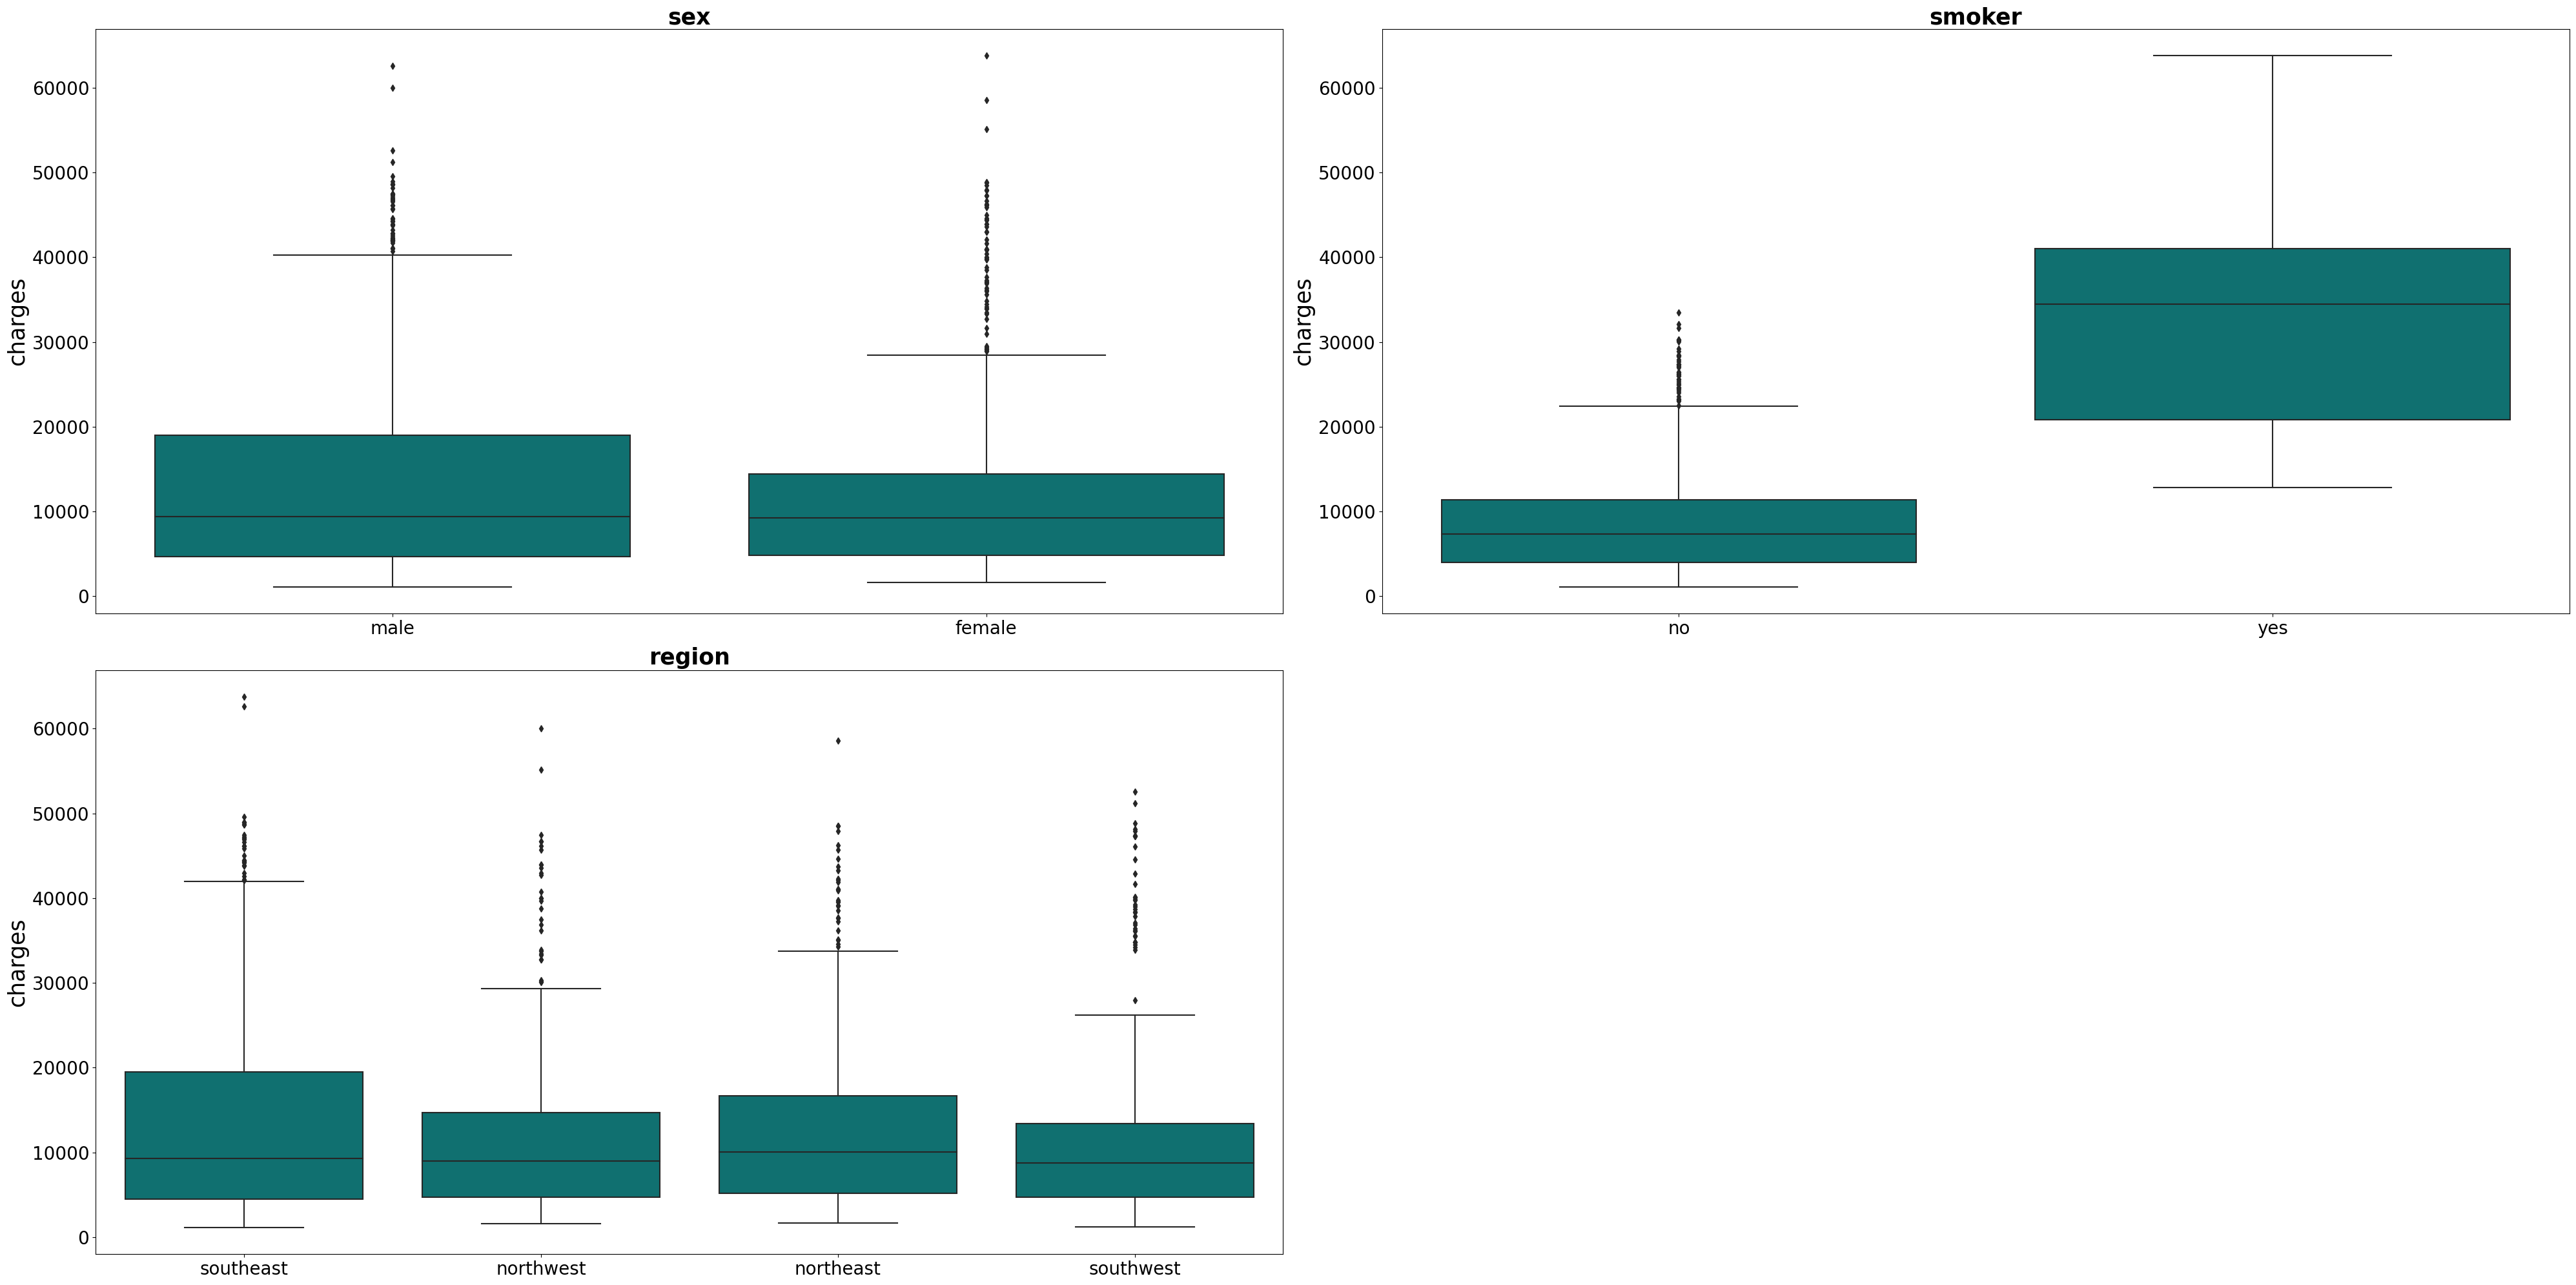

In [347]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df_STD2.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df_STD2,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

#### la unica que creo que tiene orden es la de fumador/no fumador. Las personas que fuman tienen mas gastos por lo que puede ser un orden.


In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [362]:
# labelencoder para variables con orden
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [350]:

for col in df_STD2[["smoker"]].columns:
    nuevo_nombre = col + "_encoded"
    df_STD2[nuevo_nombre] = le.fit_transform(df_STD2[col])

In [351]:
df_STD2.head()

,age,sex,bmi,children,smoker,region,charges,smoker_encoded
0,-0.875000,male,0.406921,0.0,no,southeast,1725.55230,0
1,-0.458333,male,0.315036,1.0,no,southeast,4449.46200,0
2,-0.250000,male,-0.913484,-0.5,no,northwest,21984.47061,0
3,-0.291667,male,-0.176611,-0.5,no,northwest,3866.85520,0
4,-0.333333,female,-0.551313,-0.5,no,southeast,3756.62160,0


In [352]:
#sex_transformada = le.fit_transform(df_STD2["sex"])
#sex_transformada

array([1, 1, 1, ..., 1, 0, 0])

In [353]:
#df_STD2["Sex_encoded"] = le.fit_transform(df_STD2["sex"])

In [354]:
#df_final_STD2 = df_STD2.select_dtypes(include = np.number)
#df_final_STD2.head()

,age,bmi,children,charges,smoker_encoded,Sex_encoded
0,-0.875000,0.406921,0.0,1725.55230,0,1
1,-0.458333,0.315036,1.0,4449.46200,0,1
2,-0.250000,-0.913484,-0.5,21984.47061,0,1
3,-0.291667,-0.176611,-0.5,3866.85520,0,1
4,-0.333333,-0.551313,-0.5,3756.62160,0,0


ahora con las otras 2 variables que no tienen orden, usare one-hot encoder

In [364]:
df1 = df_STD2.copy()
df1.head()

,age,sex,bmi,children,smoker,region,charges,smoker_encoded,Sex_encoded
0,-0.875000,male,0.406921,0.0,no,southeast,1725.55230,0,1
1,-0.458333,male,0.315036,1.0,no,southeast,4449.46200,0,1
2,-0.250000,male,-0.913484,-0.5,no,northwest,21984.47061,0,1
3,-0.291667,male,-0.176611,-0.5,no,northwest,3866.85520,0,1
4,-0.333333,female,-0.551313,-0.5,no,southeast,3756.62160,0,0


In [363]:
oh = OneHotEncoder()

In [368]:
# hacemos la codificación de los datos para la variable dada 

transformados = oh.fit_transform(df1[["region","sex"]])
type(transformados)

scipy.sparse._csr.csr_matrix

In [369]:
# convertimos nuestro array con la codificación hecha en un dataframe

oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3,4,5
0,0,0,1,0,0,1
1,0,0,1,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,0,1,0,1,0


In [370]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df.columns = oh.get_feature_names_out()
oh_df.columns

Index(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'sex_female', 'sex_male'],
      dtype='object')

In [372]:
oh_df.head()

,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0,0,1,0,0,1
1,0,0,1,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,0,1,0,1,0


In [373]:
df1[oh_df.columns] = oh_df
#le estamos creando unas columnas nuevas y asignandoles el valor de oh_df

In [375]:
"""#funcion para hacerlo de una
# vamos a definir una función que nos aplique este método

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff"""

"#funcion para hacerlo de una\n# vamos a definir una función que nos aplique este método\n\ndef one_hot_encoder(dff, columnas):\n    \n    '''\n    columnas: lista\n    '''\n    \n    oh = OneHotEncoder()\n    \n    transformados = oh.fit_transform(dff[columnas])\n    \n    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)\n    \n    dff[oh_df.columns] = oh_df\n    \n    dff.drop(columnas, axis = 1, inplace = True)\n    \n    return dff"

In [400]:
df1.head()

,age,bmi,children,charges,smoker_encoded,Sex_encoded,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,-0.875000,0.406921,0.0,1725.55230,0,1,0,0,1,0,0,1
1,-0.458333,0.315036,1.0,4449.46200,0,1,0,0,1,0,0,1
2,-0.250000,-0.913484,-0.5,21984.47061,0,1,0,1,0,0,0,1
3,-0.291667,-0.176611,-0.5,3866.85520,0,1,0,1,0,0,0,1
4,-0.333333,-0.551313,-0.5,3756.62160,0,0,0,0,1,0,1,0


### Empezamos coon el ajuste del modelo

In [429]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [377]:
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

In [401]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df1.drop('charges', axis =1)
y = df1['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

##### comprobar que el test y el train tengan similitud.

In [402]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())


Datos de entrenamiento
-----------------------
count     1066.000000
mean     13288.613280
std      12095.763613
min       1121.873900
25%       4769.417075
50%       9382.033000
75%      16546.058300
max      63770.428010
Name: charges, dtype: float64


In [403]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_test.describe())


Datos de entrenamiento
-----------------------
count      267.000000
mean     13025.882740
std      12014.266505
min       1136.399400
25%       4348.768875
50%       9283.562000
75%      16749.524625
max      62592.873090
Name: charges, dtype: float64


#### vamos a proceder a hacer el decision tree

In [405]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


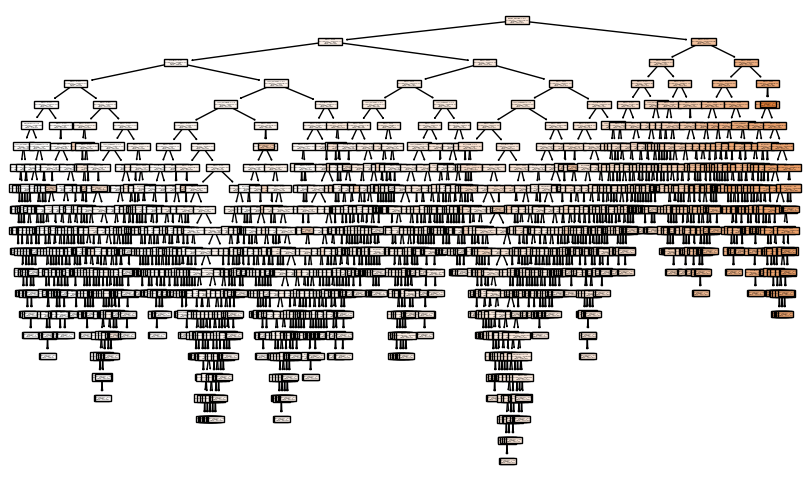

In [406]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

#### parece que esta sobreentrenado, asique usare gridsearch para corregir el modelo y cambiar ciertos parametros.

In [407]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.3166247903554

In [408]:
# max depth

print(regressor.tree_.max_depth)

21


In [409]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [434]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [435]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,3748.705895,5.434171e+07,7371.683099,0.622107,test,Decission Tree I
1,11.727220,7.330226e+04,270.743898,0.999499,train,Decission Tree I


In [441]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,6],
        "min_samples_leaf" : [10, 50, 100]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [442]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1.02 ms


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 6],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [443]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=6, max_features=6, min_samples_leaf=10,
                      min_samples_split=50)

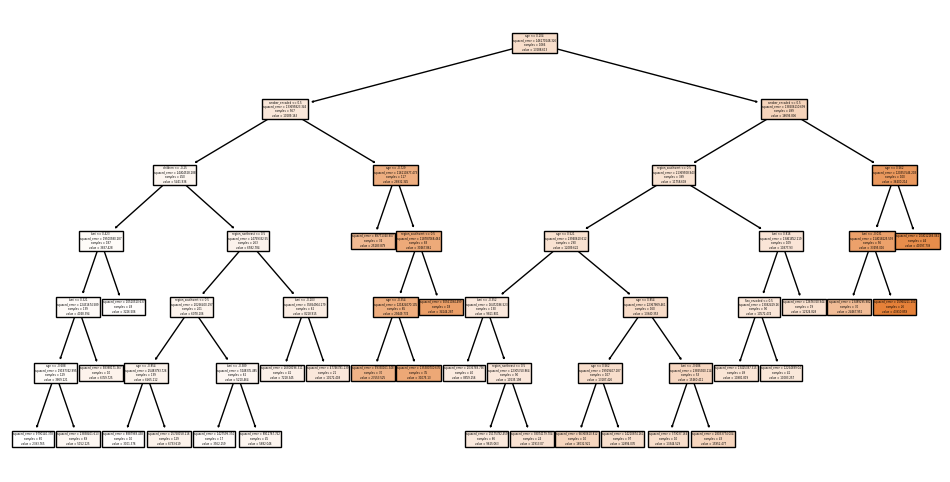

In [444]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);


In [445]:
# guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [446]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- age <= 0.10
|   |--- smoker_encoded <= 0.50
|   |   |--- children <= -0.25
|   |   |   |--- bmi <= 0.42
|   |   |   |   |--- bmi <= 0.32
|   |   |   |   |   |--- age <= -0.69
|   |   |   |   |   |   |--- value: [2393.77]
|   |   |   |   |   |--- age >  -0.69
|   |   |   |   |   |   |--- value: [5152.23]
|   |   |   |   |--- bmi >  0.32
|   |   |   |   |   |--- value: [6359.72]
|   |   |   |--- bmi >  0.42
|   |   |   |   |--- value: [3226.51]
|   |   |--- children >  -0.25
|   |   |   |--- region_northeast <= 0.50
|   |   |   |   |--- region_southwest <= 0.50
|   |   |   |   |   |--- age <= -0.85
|   |   |   |   |   |   |--- value: [3001.38]
|   |   |   |   |   |--- age >  -0.85
|   |   |   |   |   |   |--- value: [6733.62]
|   |   |   |   |--- region_southwest >  0.50
|   |   |   |   |   |--- bmi <= -0.39
|   |   |   |   |   |   |--- value: [3962.16]
|   |   |   |   |   |--- bmi >  -0.39
|   |   |   |   |   |   |--- value: [5682.05]
|   |   |   |--- region_northeast >  0.50
|   |

### prediccion

In [447]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [448]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,4054.808644,3.785972e+07,6153.025157,0.736723,test,Decision tree II
1,3581.921439,3.190128e+07,5648.122251,0.781753,train,Decision tree II


In [1]:
# Importando las bibliotecas necesarias
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Crear un conjunto de datos ficticio
datos = {'estudiante': ['Est1', 'Est2', 'Est3', 'Est4', 'Est5', 'Est6'], 
         'matematicas': [72, 68, 89, 78, 82, 92], 
         'ciencias': [81, 57, 90, 62, 70, 80]}

df = pd.DataFrame(data=datos)

# Seleccionar las columnas de características para K Means (matemáticas y ciencias)
X = np.array(df[["matematicas", "ciencias"]])

# Establecer el numero de clústeres que queremos (en este caso 2)
kmeans = KMeans(n_clusters=2)

# Entrenamiento del modelo con los datos
kmeans.fit(X)

# Identificar a qué clúster pertenece cada estudiante
df['cluster'] = kmeans.predict(X)

print(df)


  estudiante  matematicas  ciencias  cluster
0       Est1           72        81        1
1       Est2           68        57        0
2       Est3           89        90        1
3       Est4           78        62        0
4       Est5           82        70        0
5       Est6           92        80        1


c:\Users\pedro\anaconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
